In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.describe()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


무슨 말인지 알겠음.   
그렇다면 대체 데이터셋을 사용하는 게 올바르겠지? 한번 살펴보자. 

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
type(housing)

sklearn.utils._bunch.Bunch

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['TARGET'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C:\Users\kyeul\anaconda3\envs\nlp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


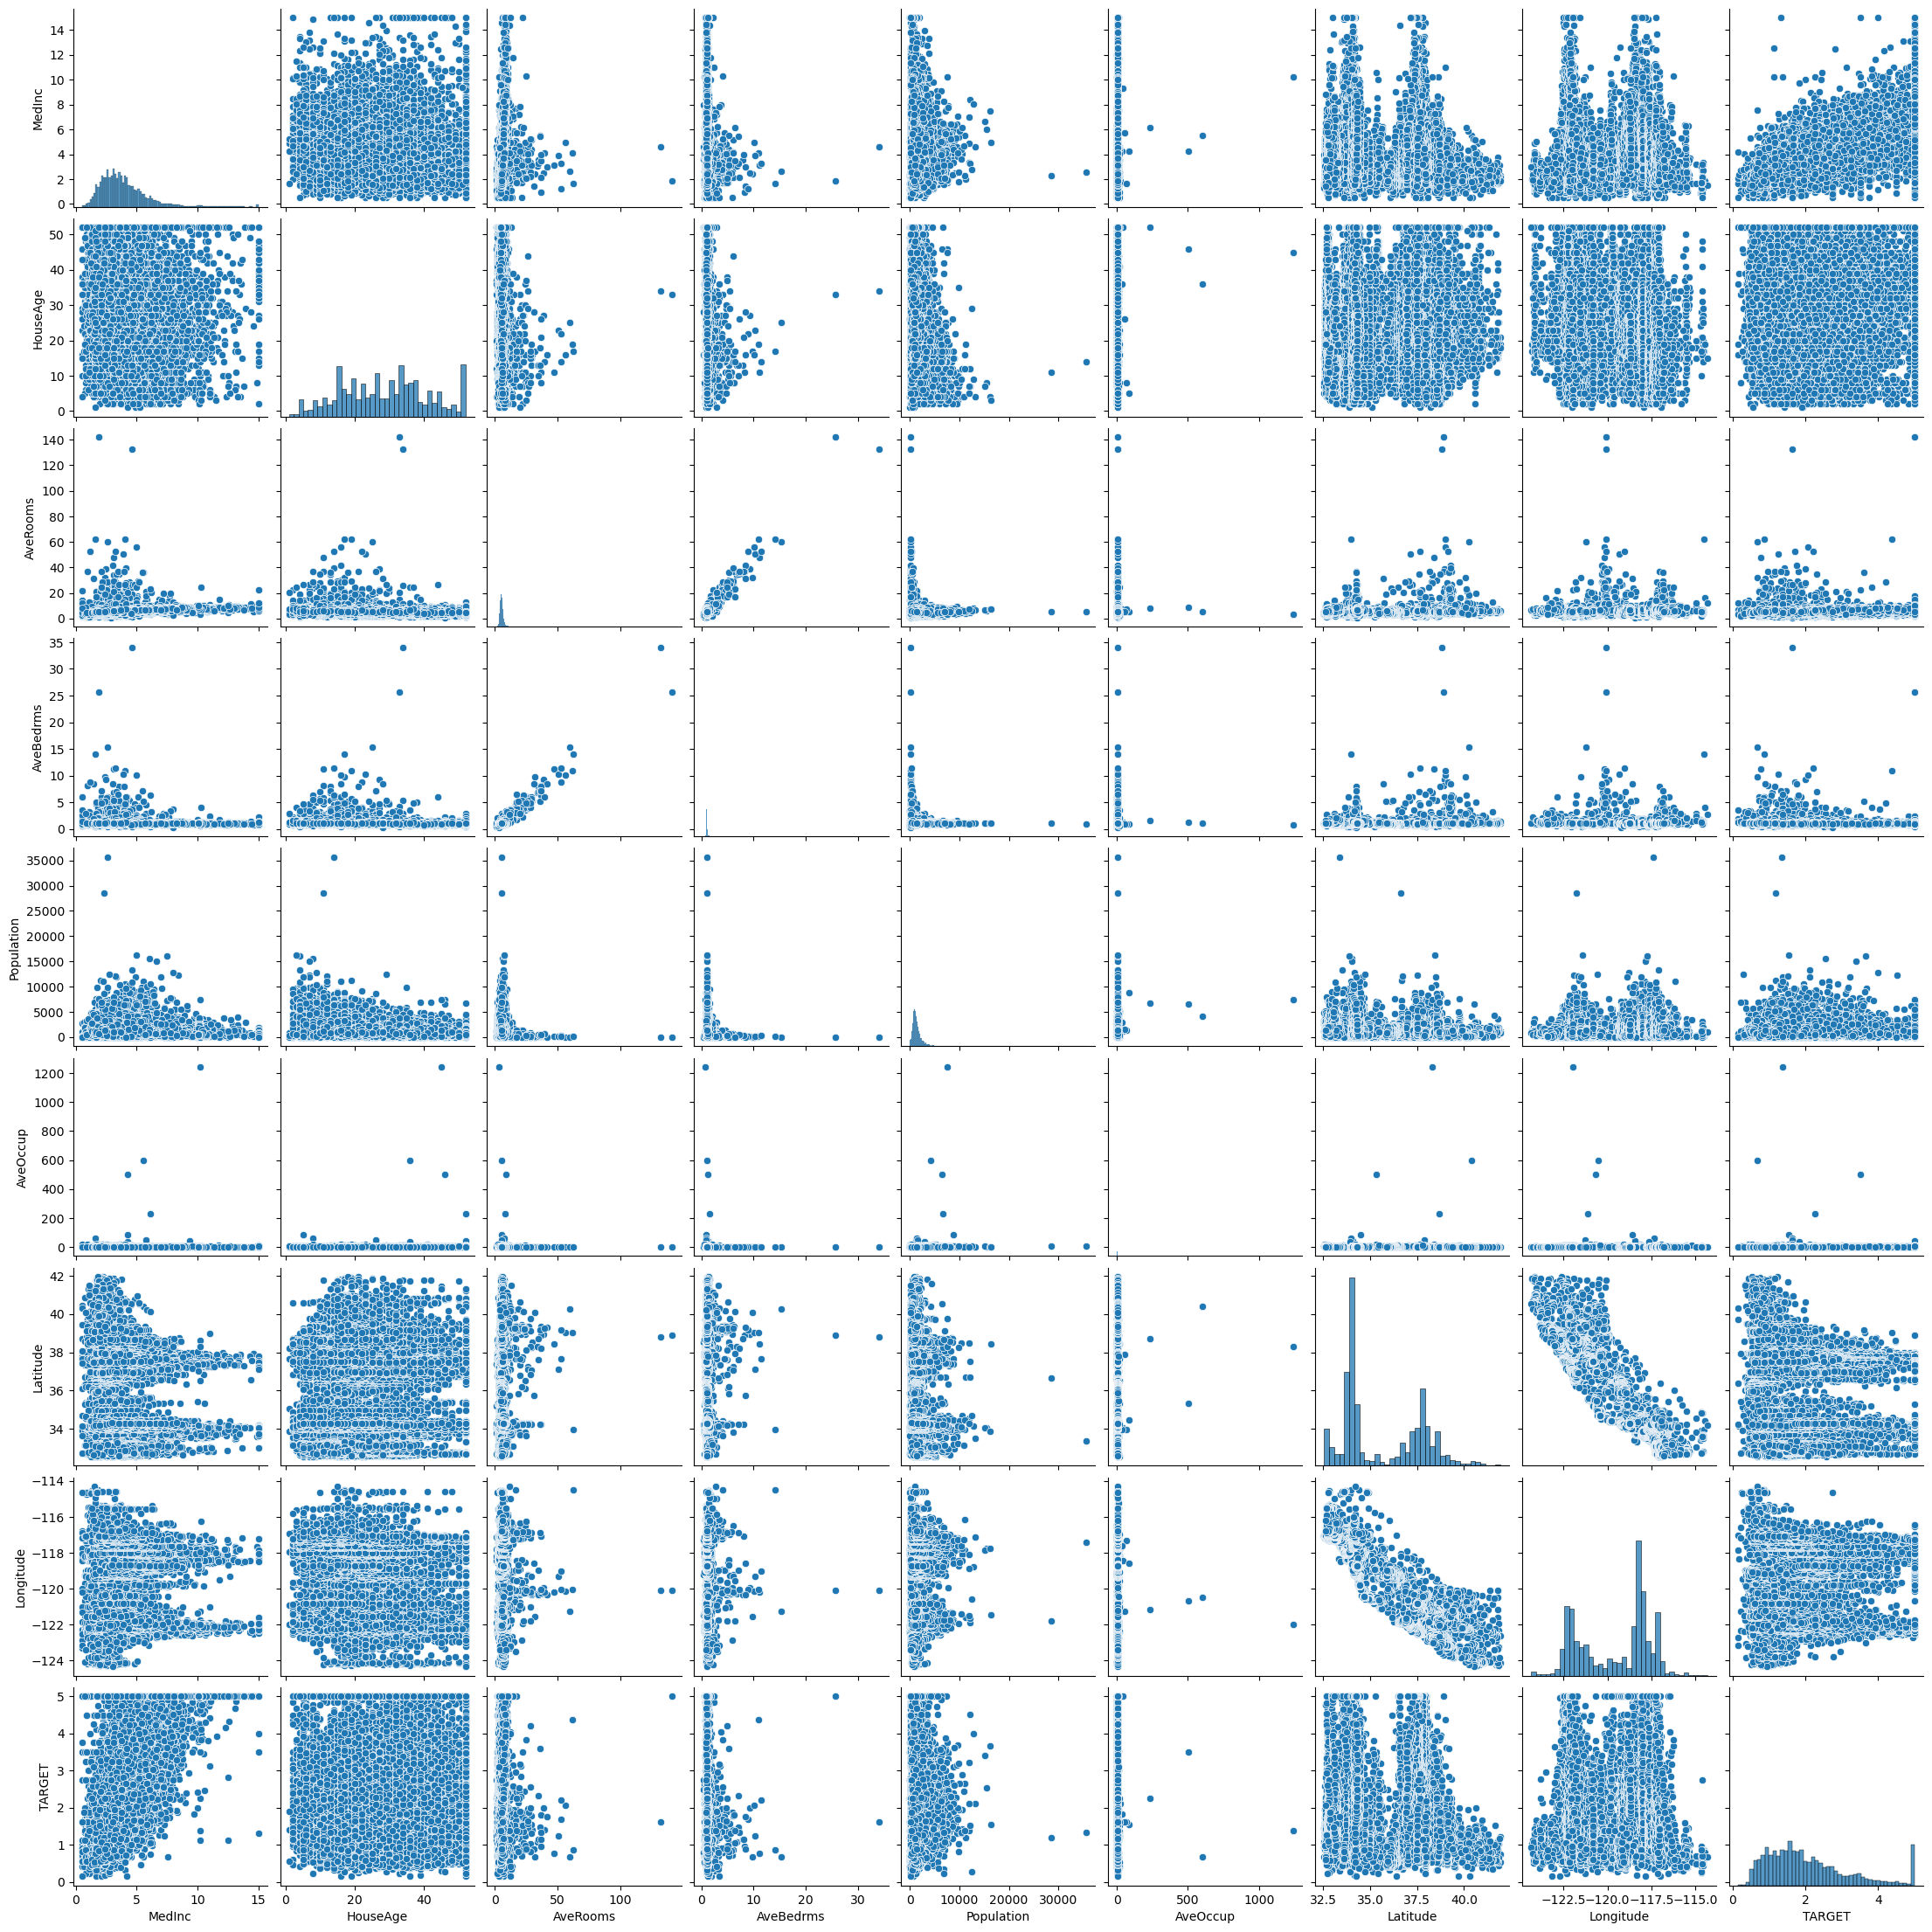

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
cols = ["TARGET", "MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


C:\Users\kyeul\anaconda3\envs\nlp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


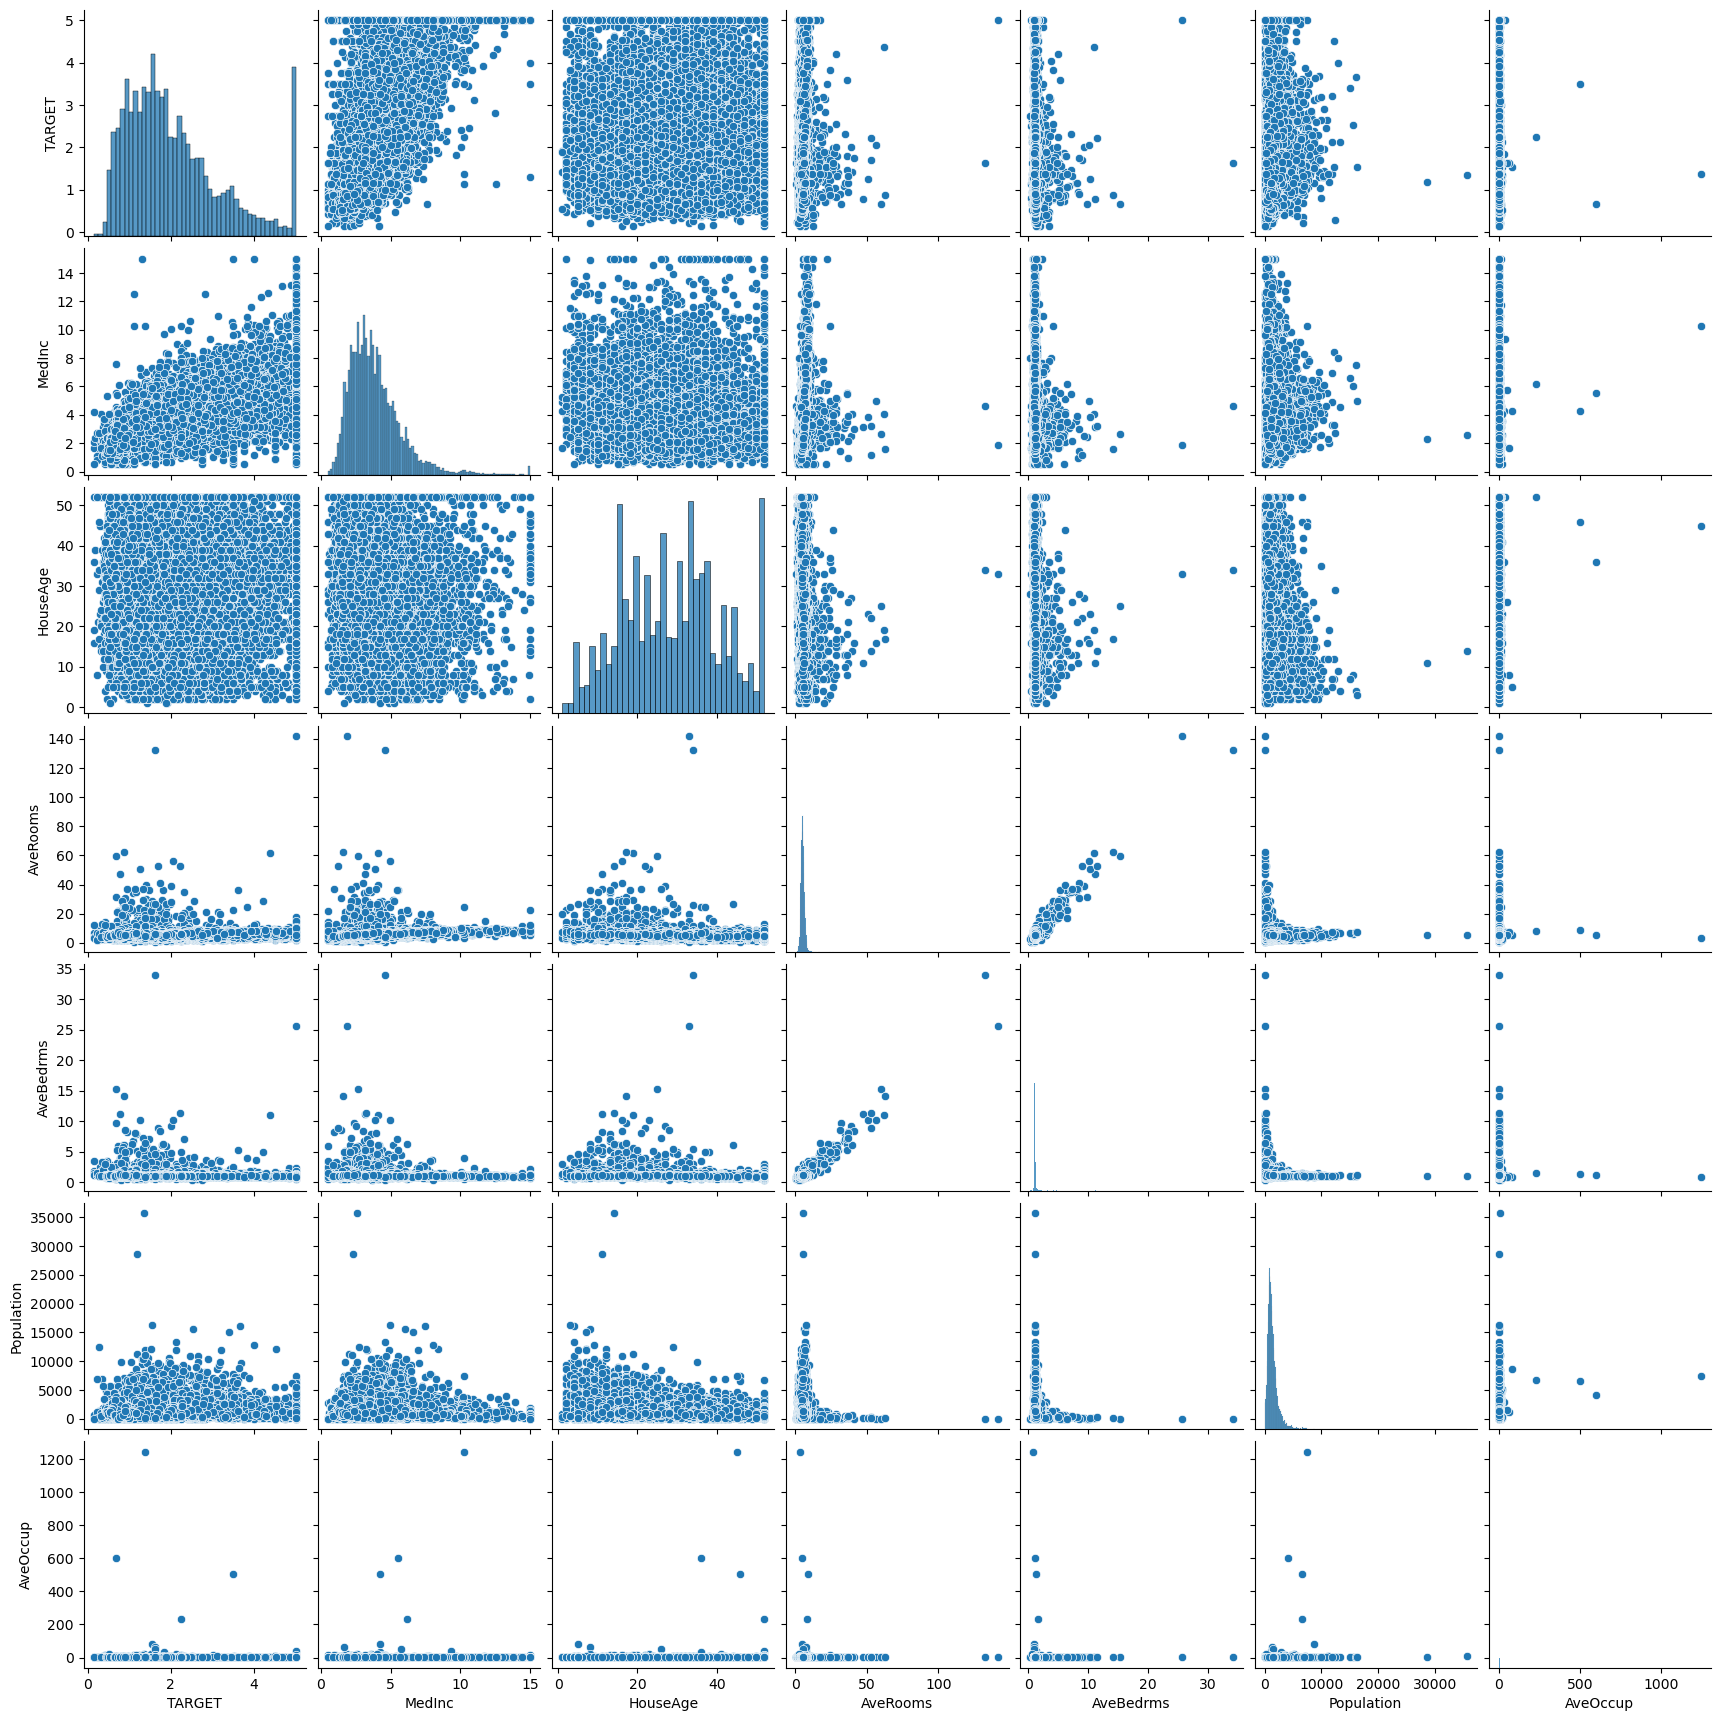

In [10]:
sns.pairplot(df[cols])
plt.show()

# Train Linear Model with PyTorch

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [17]:
torch_data = torch.from_numpy(df.values).float() # df[cols]의 값을 가져와서 torch로 변환. 데이터 타입은 float
torch_data.size()

torch.Size([20640, 9])

In [21]:
torch_data.cuda()

tensor([[   8.3252,   41.0000,    6.9841,  ...,   37.8800, -122.2300,
            4.5260],
        [   8.3014,   21.0000,    6.2381,  ...,   37.8600, -122.2200,
            3.5850],
        [   7.2574,   52.0000,    8.2881,  ...,   37.8500, -122.2400,
            3.5210],
        ...,
        [   1.7000,   17.0000,    5.2055,  ...,   39.4300, -121.2200,
            0.9230],
        [   1.8672,   18.0000,    5.3295,  ...,   39.4300, -121.3200,
            0.8470],
        [   2.3886,   16.0000,    5.2547,  ...,   39.3700, -121.2400,
            0.8940]], device='cuda:0')

In [18]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'TARGET'],
      dtype='object')

In [43]:
# Split x and y.
y = torch_data[:, -1:]
x = torch_data[:, :-1]

y, x = y.requires_grad_(True), x.requires_grad_(True)

y.shape, x.shape

(torch.Size([20640, 1]), torch.Size([20640, 8]))

In [76]:
# configuration 정의
n_epochs = 200000
learning_rate = 1e-7
print_interval = 5000

In [77]:
# Define model.
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=8, out_features=1, bias=True)

In [78]:
# Instead of implement gradient equation, we can use <optim class> to update model parameters, automatically.
optimizer = optim.SGD(model.parameters(), # model에 들어있는 parameters를 업데이트 하는 것이라고 표시
                      lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 1e-07
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [80]:
# Whole training samples are used in 1 epoch.
# Thus, "N epochs" means that model saw a sample N times.
# 배치 처리를 하지 않고 모든 데이터를 에폭마다 털어넣는다

for i in range(n_epochs):
    y_hat = model(x) # model.forward
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad() #gradient를 0으로 초기화
    loss.backward() # 미분
    
    optimizer.step() # update theta!
    
    if (i+1) % print_interval == 0:
        print("Epoch {}: loss={}".format(i+1, loss))
    # print("Epoch {}: loss={}".format(i+1, loss))

Epoch 5000: loss=1.0756416320800781
Epoch 10000: loss=1.073106288909912
Epoch 15000: loss=1.0705935955047607
Epoch 20000: loss=1.068126916885376
Epoch 25000: loss=1.0657484531402588
Epoch 30000: loss=1.0633944272994995
Epoch 35000: loss=1.0610977411270142
Epoch 40000: loss=1.0588109493255615
Epoch 45000: loss=1.0565334558486938
Epoch 50000: loss=1.0542641878128052
Epoch 55000: loss=1.0520035028457642
Epoch 60000: loss=1.049750804901123
Epoch 65000: loss=1.0475057363510132
Epoch 70000: loss=1.0452684164047241
Epoch 75000: loss=1.043038249015808
Epoch 80000: loss=1.0408153533935547
Epoch 85000: loss=1.038599967956543
Epoch 90000: loss=1.0363914966583252
Epoch 95000: loss=1.034190058708191
Epoch 100000: loss=1.0319958925247192
Epoch 105000: loss=1.029808521270752
Epoch 110000: loss=1.0276280641555786
Epoch 115000: loss=1.0254546403884888
Epoch 120000: loss=1.0232880115509033
Epoch 125000: loss=1.0211284160614014
Epoch 130000: loss=1.0189754962921143
Epoch 135000: loss=1.0168297290802002
E

lr의 값에 따라 loss가 수렴하거나 발산하는 것을 확인했다.  
lr의 값이 1e-6 크면 loss는 발산한다.  
lr의 값이 1e-7 이하면 loss는 수렴한다. 대신 학습이 오래 걸린다.  

## Let's see the result!

C:\Users\kyeul\anaconda3\envs\nlp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


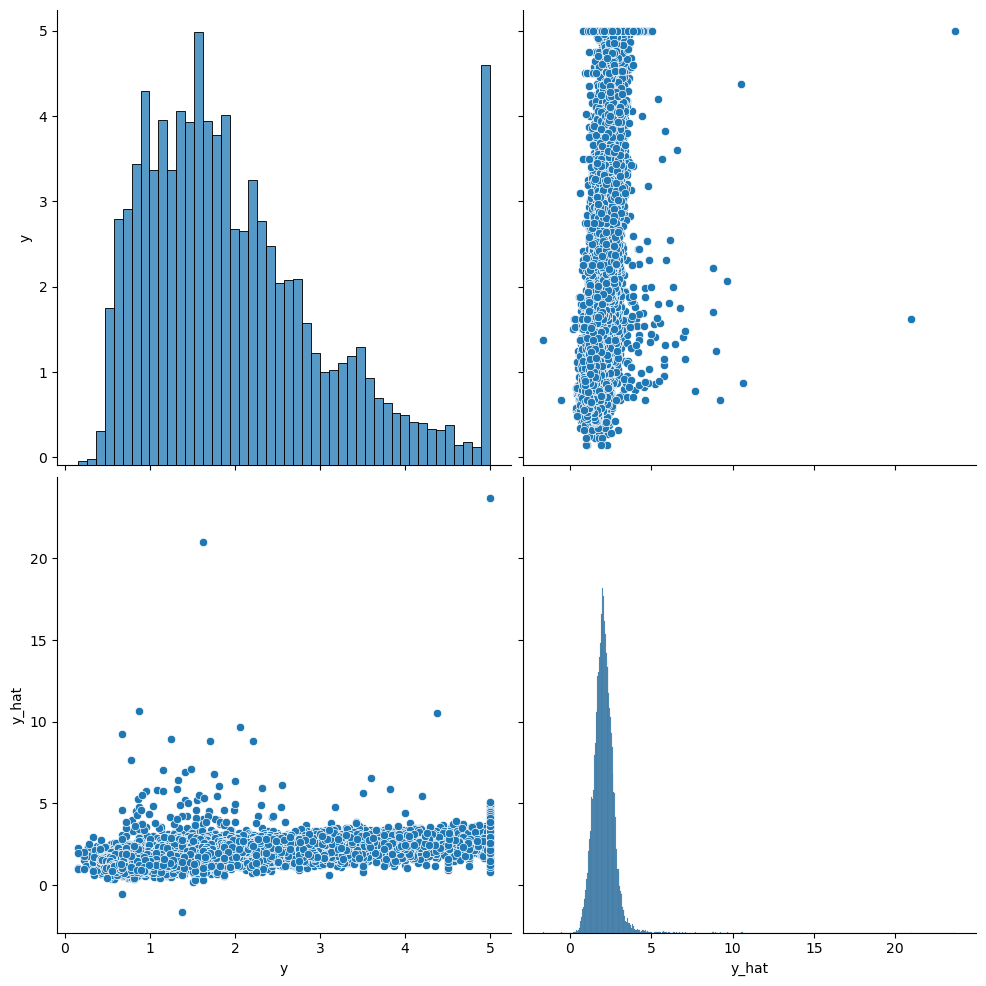

In [82]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()